In [1]:
import pandas as pd
from statsmodels.stats.weightstats import DescrStatsW
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [2]:
scf_data = pd.read_stata("../src/fedsurvey/scf/data/scf_processed.dta")
# scf_data = scf_data[scf_data["year"].astype(int) <= 2019]
# scf_data = scf_data[scf_data["year"].astype(int) >= 2010]
# scf_data = scf_data[scf_data["year"] == "2019"]
# scf_data = scf_data[scf_data["year"] != "2004"]
# scf_data = scf_data[scf_data["income"] == scf_data["norminc"]]
# scf_data = scf_data[scf_data["edcl_lbl"] == "Bachelors degree or higher"]
scf_data["wssrinc"] = scf_data["wageinc"] + scf_data["ssretinc"]

scf_data = scf_data[scf_data["networth"] > 0]
scf_data = scf_data[scf_data["fin"] > 0]
scf_data = scf_data[scf_data["income"] > 0]
scf_data = scf_data[scf_data["norminc"] > 0]
scf_data = scf_data[scf_data["wageinc"] > 0]
scf_data = scf_data[scf_data["wssrinc"] > 0]

scf_data["networth_income"] = scf_data["networth"] / scf_data["income"]
scf_data["networth_norminc"] = scf_data["networth"] / scf_data["norminc"]
scf_data["networth_wageinc"] = scf_data["networth"] / scf_data["wageinc"]
scf_data["networth_wssrinc"] = scf_data["networth"] / scf_data["wssrinc"]

scf_data["fin_income"] = scf_data["fin"] / scf_data["income"]
scf_data["fin_norminc"] = scf_data["fin"] / scf_data["norminc"]
scf_data["fin_wageinc"] = scf_data["fin"] / scf_data["wageinc"]
scf_data["fin_wssrinc"] = scf_data["fin"] / scf_data["wssrinc"]

scf_data = scf_data.replace([np.inf, -np.inf], np.nan)

In [3]:
def compute_weighted_median(data, var, weights):
    data = data[[var, weights]].dropna()
    stats = DescrStatsW(data[var], weights=data[weights])
    return stats.quantile(0.5, return_pandas=False)[0]


def compute_weighted_average(data, var, weights):
    data = data[[var, weights]].dropna()
    stats = DescrStatsW(data[var], weights=data[weights])
    return stats.mean


def compute_winsorized_mean(data, var, weights, limits):
    data = data[[var, weights]].dropna()
    data[var] = winsorize(data[var], limits=limits)
    stats = DescrStatsW(data[var], weights=data[weights])
    return stats.mean


def compute_true_winsorized_mean(data, vars, weights, limits):
    data = data[[vars, weights]].dropna()
    stats = DescrStatsW(data[vars], weights=data[weights])
    qs = stats.quantile(limits, return_pandas=False)

    data = data[(data[vars] >= qs[0]) & (data[vars] <= qs[1])]
    stats = DescrStatsW(data[vars], weights=data[weights])
    return stats.mean

/tmp/ipykernel_124773/3321257724.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scf_by_age = scf_data.groupby(["age_lbl", "year"])
/tmp/ipykernel_124773/3321257724.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medians_by_age = scf_by_age.apply(


Text(0.5, 1.0, 'Median Net Worth to Wage, SS, and Retirement Income by Age and Education')

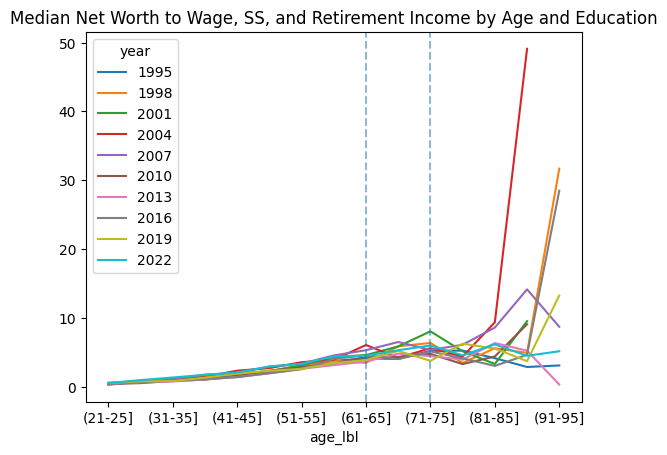

In [4]:
scf_by_age = scf_data.groupby(["age_lbl", "year"])

medians_by_age = scf_by_age.apply(compute_weighted_median, "networth_income", "wgt")

medians_by_age.unstack().plot()


plt.axvline(x=8, linestyle="--", alpha=0.5)
plt.axvline(x=10, linestyle="--", alpha=0.5)

plt.title("Median Net Worth to Wage, SS, and Retirement Income by Age and Education")

/tmp/ipykernel_124773/1211959503.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medians_by_age = scf_by_age.apply(compute_weighted_median, "networth_norminc", "wgt")


Text(0.5, 1.0, 'Median Networth to Normal Income by Age and Education')

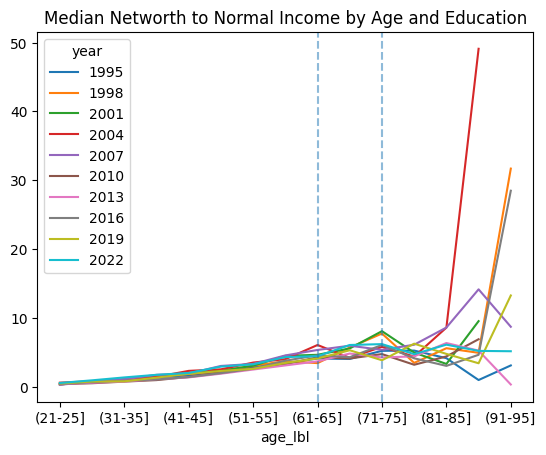

In [5]:
medians_by_age = scf_by_age.apply(compute_weighted_median, "networth_norminc", "wgt")

medians_by_age.unstack().plot()

plt.axvline(x=8, linestyle="--", alpha=0.5)
plt.axvline(x=10, linestyle="--", alpha=0.5)

plt.title("Median Networth to Normal Income by Age and Education")

/tmp/ipykernel_124773/3835980494.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medians_by_age = scf_by_age.apply(compute_weighted_median, "wssrinc", "wgt")


Text(0.5, 1.0, 'Median Wage, SS, and Retirement Income by Age and Education')

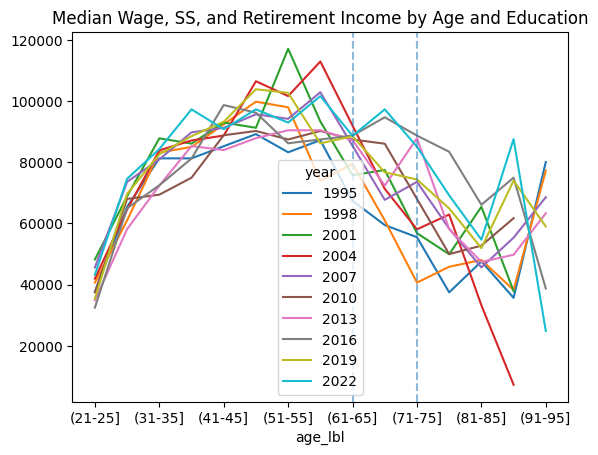

In [6]:
medians_by_age = scf_by_age.apply(compute_weighted_median, "wssrinc", "wgt")

medians_by_age.unstack().plot()

plt.axvline(x=8, linestyle="--", alpha=0.5)
plt.axvline(x=10, linestyle="--", alpha=0.5)

plt.title("Median Wage, SS, and Retirement Income by Age and Education")

/tmp/ipykernel_124773/2488323391.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medians_by_age = scf_by_age.apply(compute_weighted_median, "fin", "wgt")


Text(0.5, 1.0, 'Median Financial Assets by Age and Education')

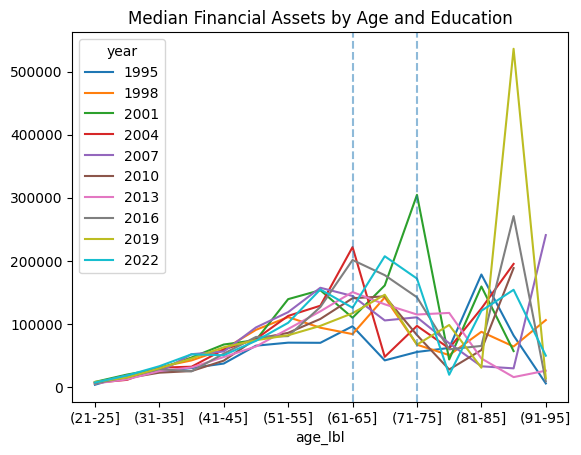

In [7]:
medians_by_age = scf_by_age.apply(compute_weighted_median, "fin", "wgt")

medians_by_age.unstack().plot()

plt.axvline(x=8, linestyle="--", alpha=0.5)
plt.axvline(x=10, linestyle="--", alpha=0.5)

plt.title("Median Financial Assets by Age and Education")

/tmp/ipykernel_124773/4243411857.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medians_by_age = scf_by_age.apply(


Text(0.5, 1.0, 'Winsorized Mean Financial Assets to Wage, SS, and Retirement Income by Age and Education')

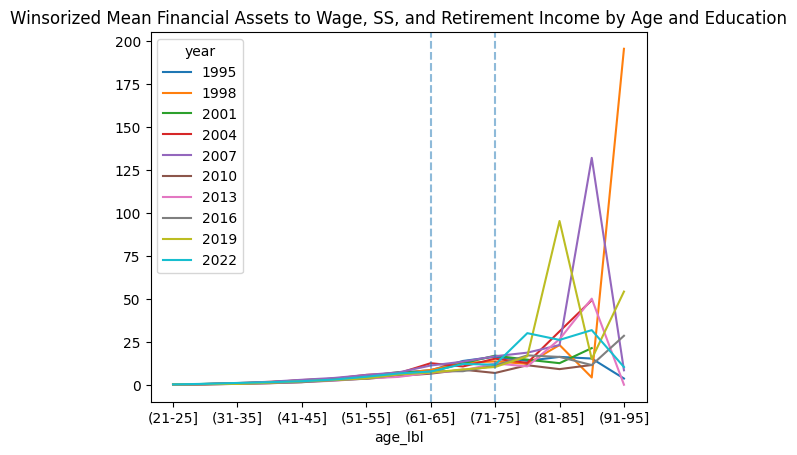

In [8]:
medians_by_age = scf_by_age.apply(
    compute_winsorized_mean, "networth_wssrinc", "wgt", (0.40, 0.40)
)

medians_by_age.unstack().plot()


plt.axvline(x=8, linestyle="--", alpha=0.5)
plt.axvline(x=10, linestyle="--", alpha=0.5)

plt.title(
    "Winsorized Mean Financial Assets to Wage, SS, and Retirement Income by Age and Education"
)

/tmp/ipykernel_124773/1036876148.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_by_age.groupby("age_lbl").mean().plot()


<Axes: xlabel='age_lbl'>

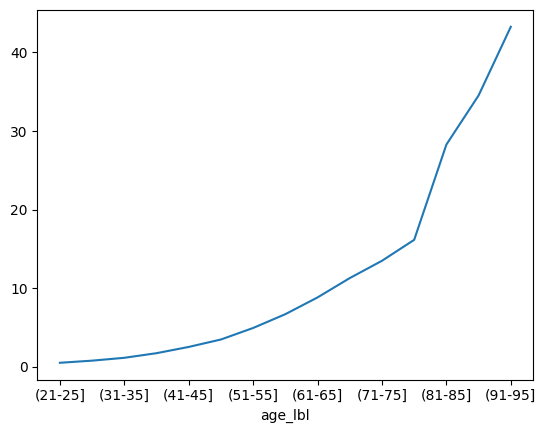

In [9]:
medians_by_age.groupby("age_lbl").mean().plot()

In [10]:
scf_alt = pd.read_csv("SCFdata.csv")
scf_alt_by_age = scf_alt.groupby(["age_group", "education"])

/tmp/ipykernel_124773/1311426084.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scf_alt_by_age.apply(


<Axes: xlabel='age_group'>

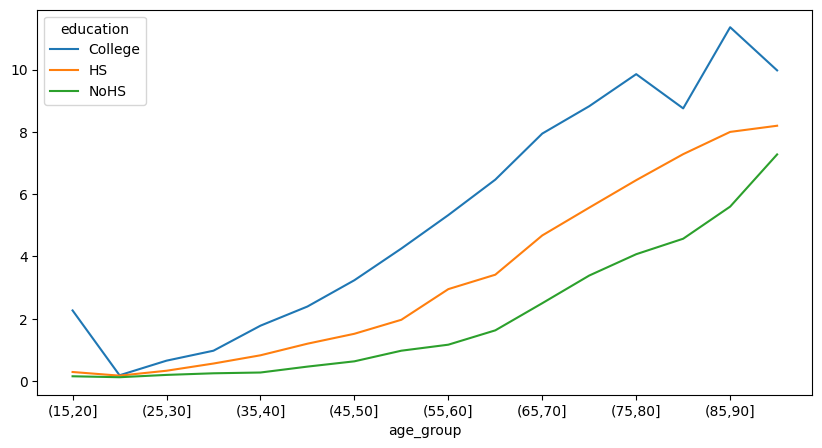

In [11]:
scf_alt_by_age.apply(
    compute_weighted_median, "wealth_income_ratio", "weight"
).unstack().plot(figsize=(10, 5))

In [12]:
scf_by_age = scf_data.groupby("age_lbl")

medians_by_age = scf_by_age.apply(
    compute_true_winsorized_mean, "networth_wssrinc", "wgt", (0.40, 0.60)
)

/tmp/ipykernel_124773/3397829931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scf_by_age = scf_data.groupby("age_lbl")
/tmp/ipykernel_124773/3397829931.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medians_by_age = scf_by_age.apply(


Text(0.5, 1.0, 'Winsorized Mean Financial Assets to Wage, SS, and Retirement Income by Age and Education')

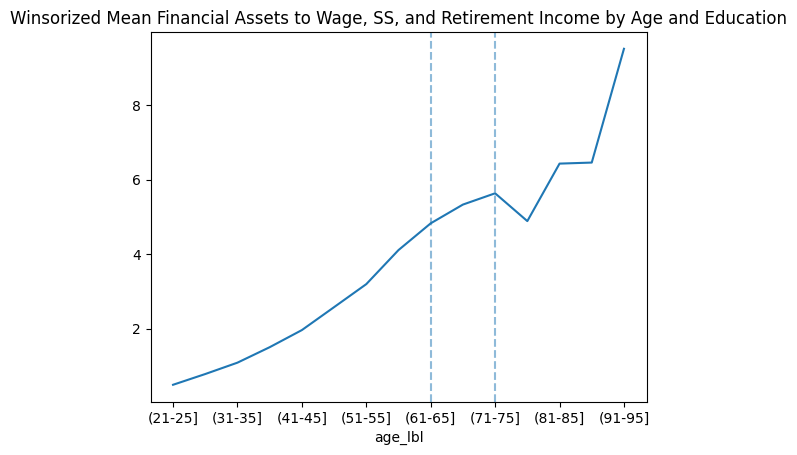

In [13]:
medians_by_age.plot()

plt.axvline(x=8, linestyle="--", alpha=0.5)
plt.axvline(x=10, linestyle="--", alpha=0.5)

plt.title(
    "Winsorized Mean Financial Assets to Wage, SS, and Retirement Income by Age and Education"
)